In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Load the dataset
df = pd.read_csv(r'C:\Users\Administrator\Downloads\Data Analyst Portfolio\Superstore.csv', encoding='latin1')

In [4]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Get basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
print(df.describe())

First 5 rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Cat


Correlation Matrix (Sales, Profit, Discount):
             Sales    Profit  Discount
Sales     1.000000  0.479064 -0.028190
Profit    0.479064  1.000000 -0.219487
Discount -0.028190 -0.219487  1.000000


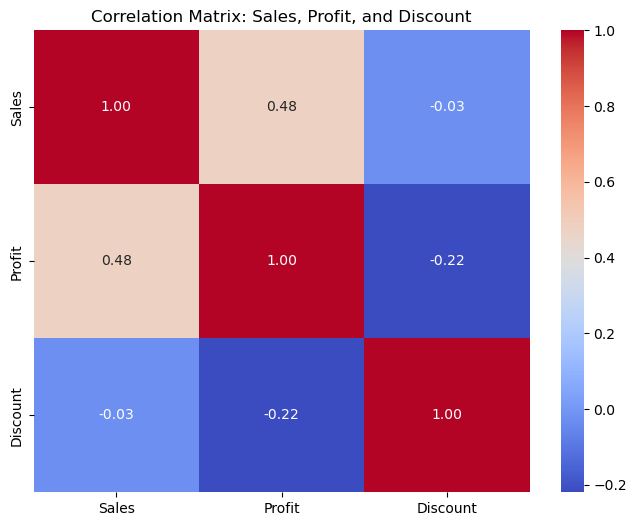

In [5]:
# Calculate the correlation matrix for Sales, Profit, and Discount
correlation_matrix = df[['Sales', 'Profit', 'Discount']].corr()

# Print the correlation matrix
print("\nCorrelation Matrix (Sales, Profit, Discount):")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Sales, Profit, and Discount')
plt.show()


The category with the highest profit is: Technology with a profit of $145454.95


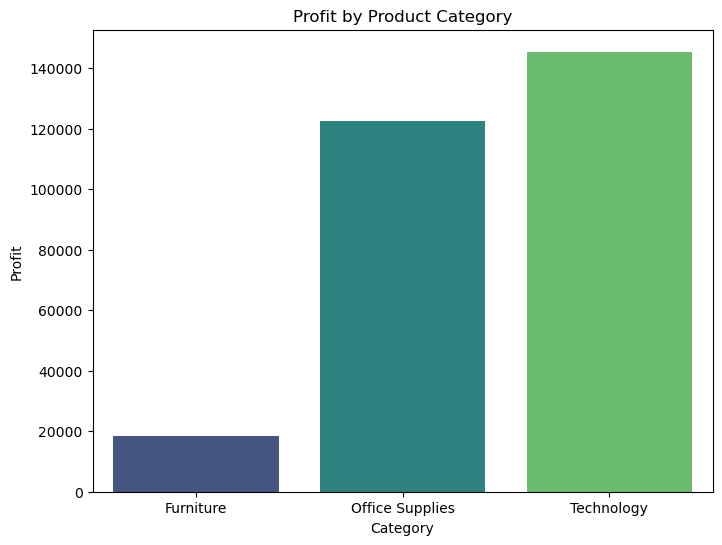

In [7]:
# Group data by 'Category' and calculate the total profit for each category
category_profit = df.groupby('Category')['Profit'].sum().reset_index()

# Find the category with the highest profit
highest_profit_category = category_profit.loc[category_profit['Profit'].idxmax()]

# Print the result
print(f"\nThe category with the highest profit is: {highest_profit_category['Category']} with a profit of ${highest_profit_category['Profit']:.2f}")

# Visualize the profit by category using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Profit', data=category_profit, hue='Category', dodge=False, palette='viridis')
plt.legend([],[], frameon=False)
plt.title('Profit by Product Category')
plt.show()


Sales and Profit by Region:
    Region        Sales       Profit
0  Central  501239.8908   39706.3625
1     East  678781.2400   91522.7800
2    South  391721.9050   46749.4303
3     West  725457.8245  108418.4489


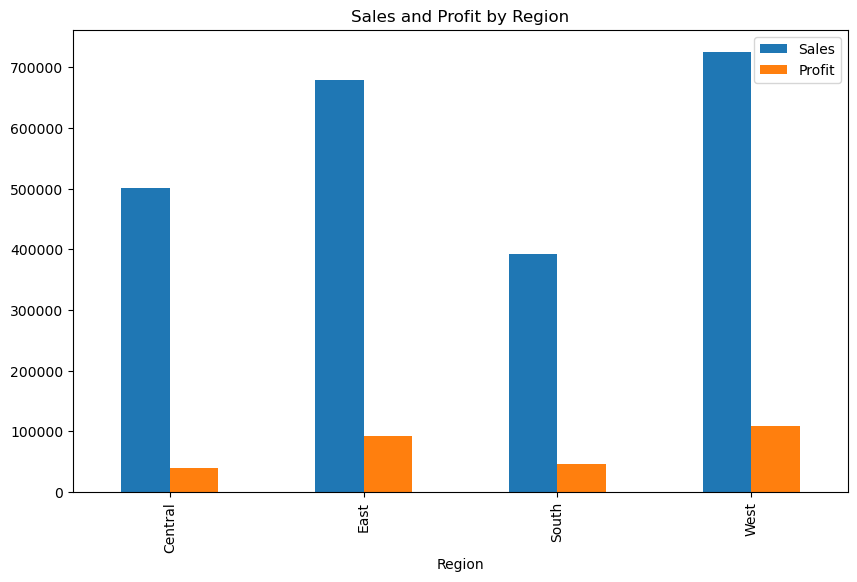

In [5]:
# Group data by 'Region' and calculate total sales and profit for each region
region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

# Print the result
print("\nSales and Profit by Region:")
print(region_sales_profit)

# Visualize sales and profit by region using a bar plot
region_sales_profit.plot(kind='bar', x='Region', y=['Sales', 'Profit'], figsize=(10, 6))
plt.title('Sales and Profit by Region')
plt.show()


Average Profit by Shipping Mode:
        Ship Mode     Profit
0     First Class  31.839948
1        Same Day  29.266591
2    Second Class  29.535545
3  Standard Class  27.494770


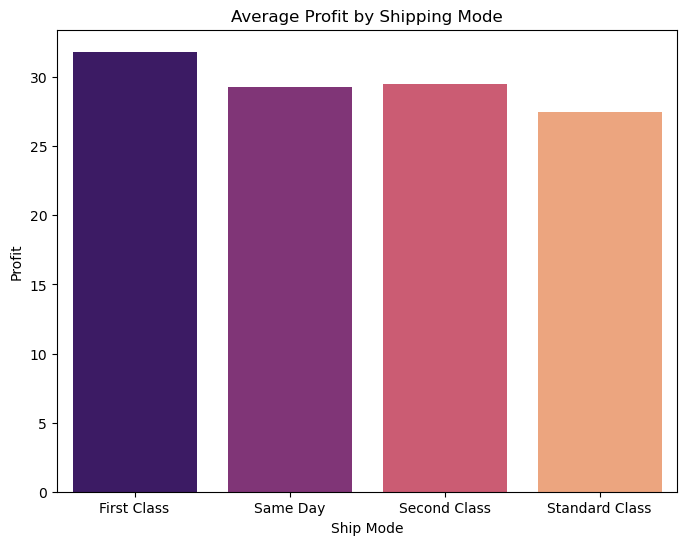

In [8]:
# Group data by 'Ship Mode' and calculate average profit for each shipping mode
shipping_mode_profit = df.groupby('Ship Mode')['Profit'].mean().reset_index()

# Print the result
print("\nAverage Profit by Shipping Mode:")
print(shipping_mode_profit)

# Visualize average profit by shipping mode using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Ship Mode', y='Profit', data=shipping_mode_profit, hue='Ship Mode', dodge=False, palette='magma')
plt.legend([],[], frameon=False)
plt.title('Average Profit by Shipping Mode')
plt.show()

In [10]:
# Calculate correlation between Sales and Profit
correlation_sales_profit = df['Sales'].corr(df['Profit'])

# Print a summary of all findings
print("\nSummary of Findings:")
print(f"1. Sales and Profit have a correlation of {correlation_sales_profit:.2f}.")
print(f"2. The most profitable category is {highest_profit_category['Category']}.")
print(f"3. The region with the highest sales and profit is {region_sales_profit.loc[region_sales_profit['Sales'].idxmax(), 'Region']}.")
print(f"4. Shipping mode 'First Class' has the highest average profit.")


Summary of Findings:
1. Sales and Profit have a correlation of 0.48.
2. The most profitable category is Technology.
3. The region with the highest sales and profit is West.
4. Shipping mode 'First Class' has the highest average profit.
